In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [3]:
# Load the data again. Keep air quality data, drop the index column
# and any missing data columns.
df = pd.read_csv(
    '/Users/elijahwoolford/Desktop/python /Default.csv').iloc[:,1:].dropna()

# Recode strings to numeric.
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

Y_train = df_train['income'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Make some new features to capture potential quadratic and cubic
# relationships between solar radiation and day or temperature.
df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Test the simpler model with smaller coefficients.
Y_test = df_test['income'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['income'])]

# Test the more complex model with larger coefficients.
df_test['balance_student'] = df_test['balance'] * df_test['student']
df_test['balance_default'] = df_test['balance'] * df_test['default']
df_test['student_default'] = df_test['student'] * df_test['default']
df_test['balance_sqrt'] = (df_test['balance'] + 100) ** .5
df_test['balance2'] = (df_test['balance'] + 100) ** 2
df_test['balance3'] = (df_test['balance'] + 100) ** 3
X_test2 = df_test.loc[:, ~(df_test.columns).isin(['income'])]


In [6]:
# Small number of parameters.
lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X_train, Y_train)
print('R² for the model with few features:')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

# Large number of parameters.
lassBig = linear_model.Lasso(alpha=.35)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)

r_squares = []
r_squares.append(lassBig.score(X_train2, Y_train))

R² for the model with few features:
0.4500625793021287

Parameter estimates for the model with few features:
[-0.         -0.40657726 -0.          0.00114596]

R² for the model with many features:
0.44363376712918823

Parameter estimates for the model with many features:
[ 0.00000000e+00 -3.89351238e-01  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -2.77688887e-04
 -7.09158792e-07  3.48711577e+00]


In [5]:
print(lass.score(X_test, Y_test))

print(lassBig.score(X_test2, Y_test))

0.4455322515099282
0.4380466345872402


In [10]:
lassBig2 = linear_model.Lasso(alpha=.5)
lassBig2.fit(X_train2, Y_train)
print('R2 for alpha .5:')
print(lassBig2.score(X_train2, Y_train))
r_squares.append(lassBig2.score(X_train2, Y_train))

R2 for alpha .5:
0.30824960733032325


In [17]:
lassBig3 = linear_model.Lasso(alpha=.75)
lassBig3.fit(X_train2, Y_train)
print('R2 for alpha .75:')
print(lassBig3.score(X_train2, Y_train))
r_squares.append(lassBig3.score(X_train2, Y_train))

R2 for alpha .75:
0.026834134837274926


In [19]:
lassBig4 = linear_model.Lasso(alpha=1)
lassBig4.fit(X_train2, Y_train)
print('R2 for alpha 1:')
print(lassBig4.score(X_train2, Y_train))
r_squares.append(lassBig4.score(X_train2, Y_train))

R2 for alpha 1:
0.026834134354422945


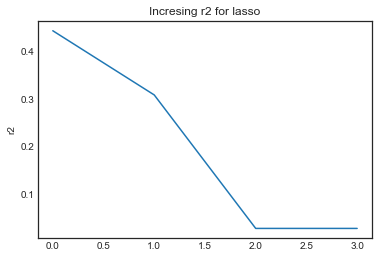

In [16]:
plt.plot(r_squares)
plt.title("Incresing r2 for lasso")
plt.ylabel("r2")
plt.show()

In [33]:
ridgeregr = linear_model.Ridge(alpha=.35, fit_intercept=False) 
ridgeregr.fit(X_train, Y_train)
print('R2 for alpha .35:')
print(ridgeregr.score(X_train, Y_train))

r2_squared = []
r2_squared.append(ridgeregr.score(X_train, Y_train))

R2 for alpha .35:
0.573876352962583


In [34]:
ridgeregr1 = linear_model.Ridge(alpha=5, fit_intercept=False) 
ridgeregr1.fit(X_train, Y_train)
print('R2 for alpha .5:')
print(ridgeregr1.score(X_train, Y_train))

r2_squared.append(ridgeregr1.score(X_train, Y_train))

R2 for alpha .5:
0.5738757447232978


In [35]:
ridgeregr2 = linear_model.Ridge(alpha=10, fit_intercept=False) 
ridgeregr2.fit(X_train, Y_train)
print('R2 for alpha .75:')
print(ridgeregr2.score(X_train, Y_train))

r2_squared.append(ridgeregr2.score(X_train, Y_train))

R2 for alpha .75:
0.5738739164412499


In [36]:
ridgeregr3 = linear_model.Ridge(alpha=20, fit_intercept=False) 
ridgeregr3.fit(X_train, Y_train)
print('R2 for alpha .75:')
print(ridgeregr3.score(X_train, Y_train))

r2_squared.append(ridgeregr3.score(X_train, Y_train))

R2 for alpha .75:
0.5738666411611374


Text(0,0.5,'r2')

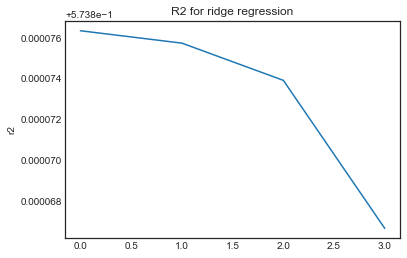

In [37]:
plt.plot(r2_squared)
plt.title("R2 for ridge regression")
plt.ylabel("r2")